# Data selection and exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\sanju\Downloads\archive(2).zip")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [4]:
df.shape

(2000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [6]:
df.rename(columns={"Annual Income ($)": "Income","Spending Score (1-100)":"Spending Score"}, inplace=True)

In [7]:
df.describe()

,CustomerID,Age,Income,Spending Score,Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [8]:
df.isnull().sum()

CustomerID          0
Gender              0
Age                 0
Income              0
Spending Score      0
Profession         35
Work Experience     0
Family Size         0
dtype: int64

In [9]:
df = df.drop_duplicates()

In [10]:
df = df.dropna(subset=['Profession'])

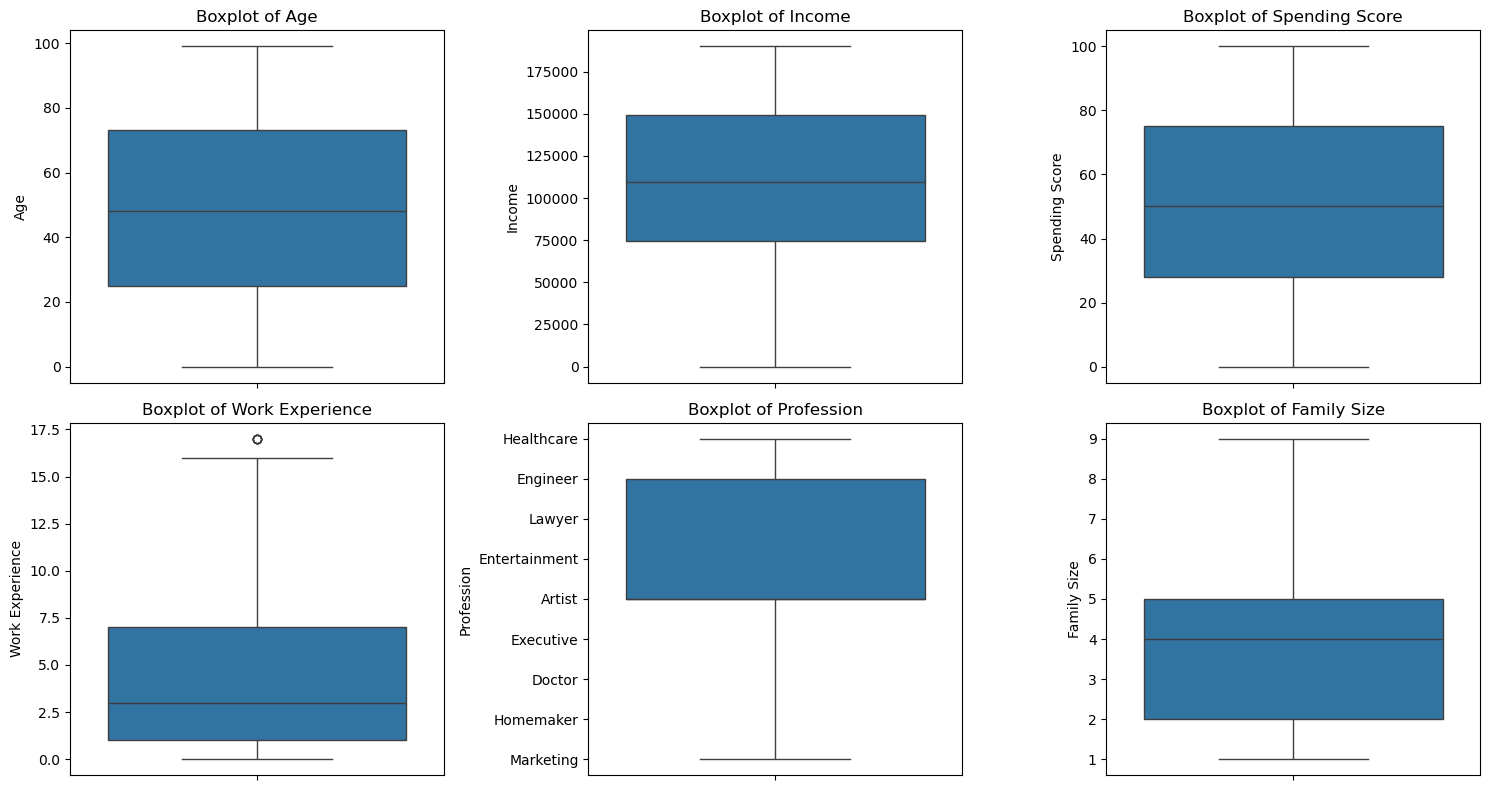

In [11]:
num_cols = ['Age', 'Income', 'Spending Score', 'Work Experience','Profession', 'Family Size']

plt.figure(figsize=(15,8))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)   # adjust rows/columns depending on number of variables
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

<Axes: xlabel='Profession'>

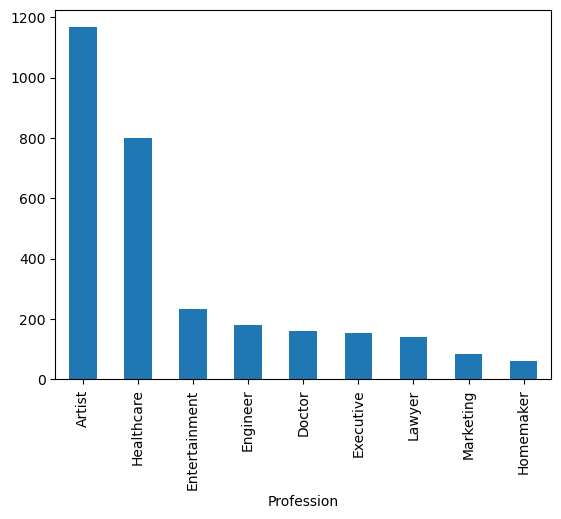

In [12]:
df['Gender'].value_counts().plot(kind='bar')
df['Profession'].value_counts().plot(kind='bar')

<Axes: xlabel='Income', ylabel='Count'>

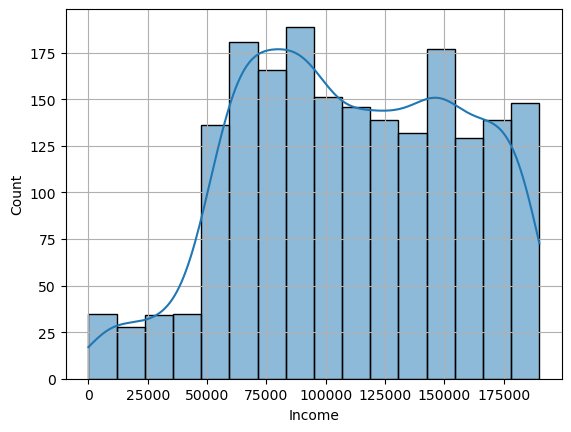

In [13]:
df['Age'].hist(bins=20)
sns.histplot(df['Income'], kde=True)

<Axes: xlabel='Income', ylabel='Spending Score'>

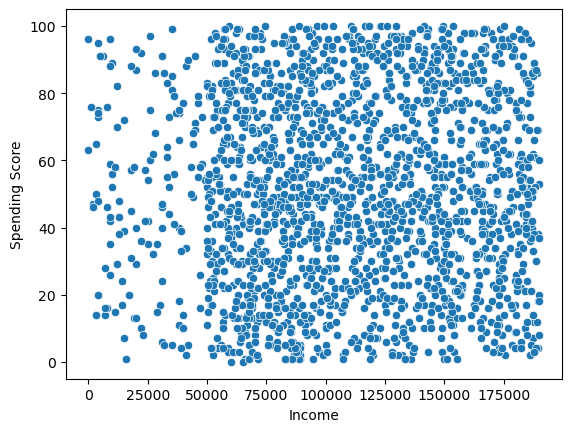

In [14]:
sns.scatterplot(x='Income', y='Spending Score', data=df)

<Axes: xlabel='Gender', ylabel='Spending Score'>

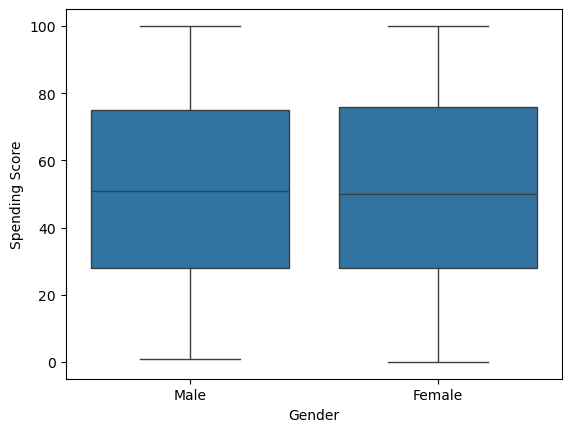

In [16]:
sns.boxplot(x='Gender', y='Spending Score', data=df)

In [18]:
df = df.select_dtypes(include=['number'])

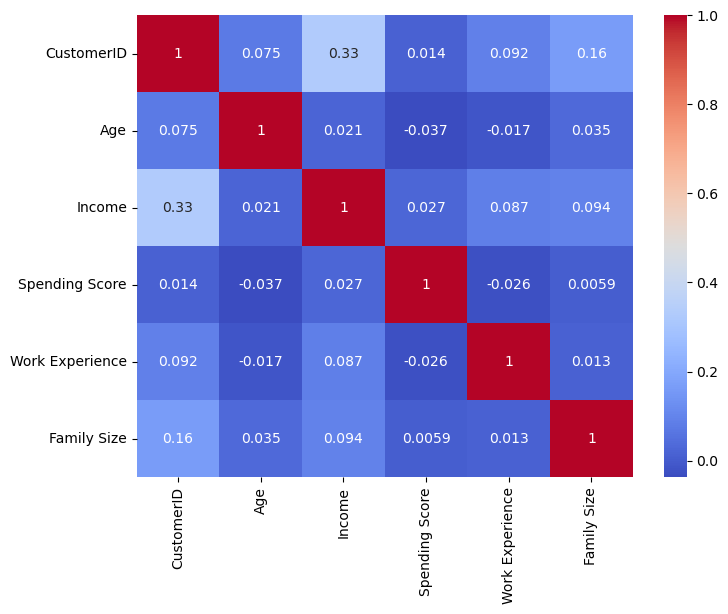

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [20]:
import os
os.environ["OMP_NUM_THREADS"] = "8"

<Axes: xlabel='Income', ylabel='Spending Score'>

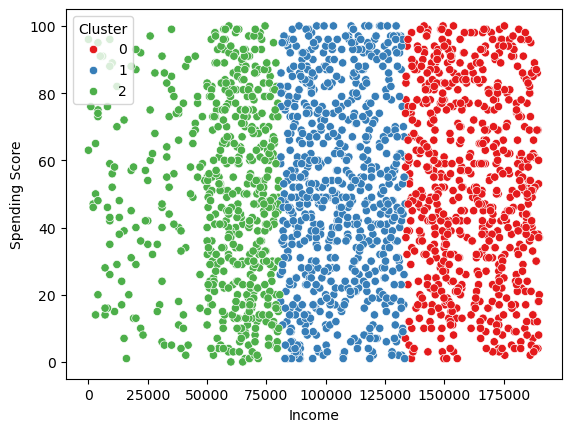

In [21]:
from sklearn.cluster import KMeans

X = df[['Income', 'Spending Score']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

sns.scatterplot(x='Income', y='Spending Score', hue='Cluster', data=df, palette='Set1')

In [22]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,CustomerID,Age,Income,Spending Score,Work Experience,Family Size,Cluster
0,1,19,15000,39,1,4,2
1,2,21,35000,81,3,3,2
2,3,20,86000,6,1,1,1
3,4,23,59000,77,0,2,2
4,5,31,38000,40,2,6,2


# Classification model using support vector machines (SVM)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from mpl_toolkits.mplot3d import Axes3D

In [24]:
X = df[['Age', 'Income', 'Spending Score']]
y = kmeans.labels_

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
svm_model = SVC(kernel='rbf', gamma='scale')
svm_model.fit(X_train, y_train)

SVC()

In [27]:
y_pred = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

SVM Accuracy: 0.9915254237288136

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       216
           1       0.98      1.00      0.99       216
           2       0.99      1.00      1.00       158

    accuracy                           0.99       590
   macro avg       0.99      0.99      0.99       590
weighted avg       0.99      0.99      0.99       590


Confusion Matrix:
 [[212   4   0]
 [  0 215   1]
 [  0   0 158]]


# 3D visualization

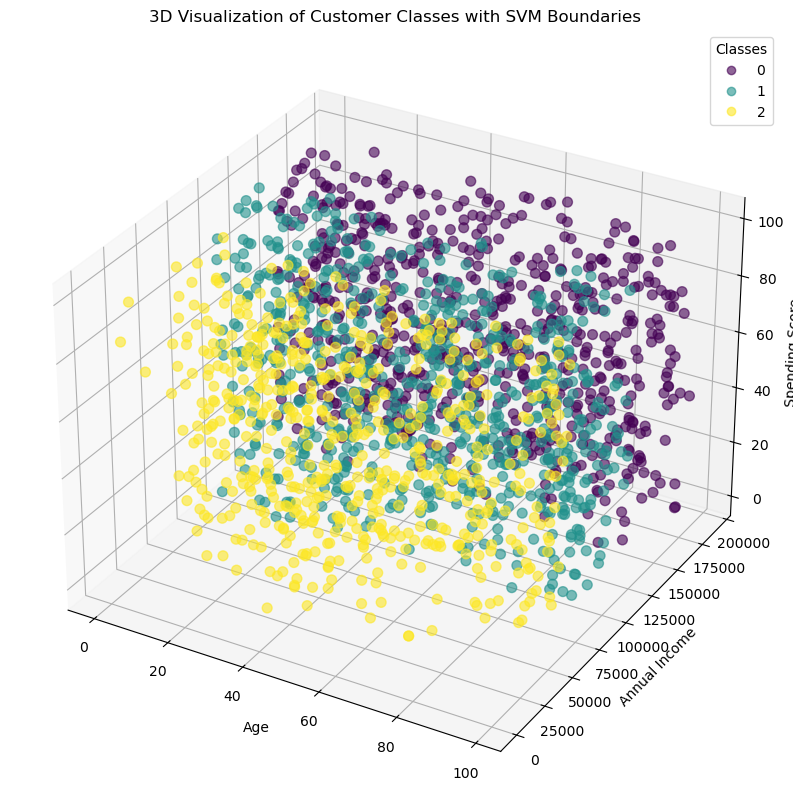

In [40]:
# 3D plot of decision boundaries
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Scatter original points
scatter = ax.scatter(X['Age'], X['Income'], X['Spending Score'],
                     c=y, cmap='viridis', s=50, alpha=0.6)

# Labels
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.title("3D Visualization of Customer Classes with SVM Boundaries")
plt.legend(*scatter.legend_elements(), title="Classes")

plt.show()

# Implementation of random forest and XG boost algorithms

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
X = df[['Age', 'Income', 'Spending Score']]
y = kmeans.labels_ 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report (RF):\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix (RF):\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.9983050847457627

Classification Report (RF):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       216
           1       1.00      1.00      1.00       216
           2       1.00      1.00      1.00       158

    accuracy                           1.00       590
   macro avg       1.00      1.00      1.00       590
weighted avg       1.00      1.00      1.00       590


Confusion Matrix (RF):
 [[216   0   0]
 [  1 215   0]
 [  0   0 158]]


In [ ]:
from xgboost import XGBClassifier

In [32]:
xgb_model = XGBClassifier(use_label_encoder =False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report (XGB):\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix (XGB):\n", confusion_matrix(y_test, y_pred_xgb))

C:\Users\sanju\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:56:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9915254237288136

Classification Report (XGB):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       216
           1       1.00      0.98      0.99       216
           2       0.98      1.00      0.99       158

    accuracy                           0.99       590
   macro avg       0.99      0.99      0.99       590
weighted avg       0.99      0.99      0.99       590


Confusion Matrix (XGB):
 [[215   1   0]
 [  1 212   3]
 [  0   0 158]]


In [33]:
print("SVM Accuracy:", accuracy_score(y_test, svm_model.predict(X_test)))

SVM Accuracy: 0.9915254237288136


                        Accuracy
SVM Accuracy            0.991525
Random Forest Accuracy  0.998305
XGBoost Accuracy        0.991525


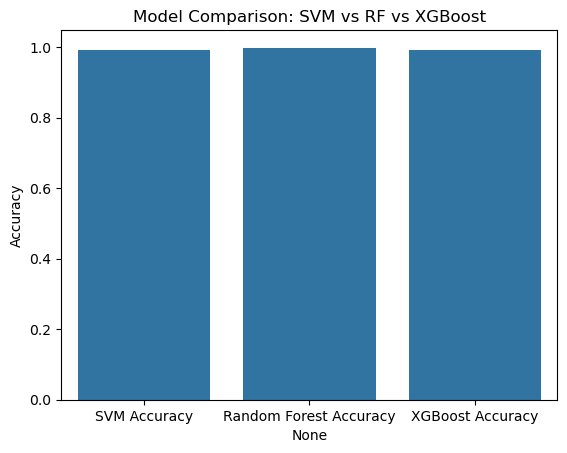

In [34]:
results = {
    "SVM Accuracy": accuracy_score(y_test, y_pred),
    "Random Forest Accuracy": accuracy_score(y_test, y_pred_rf),
    "XGBoost Accuracy": accuracy_score(y_test, y_pred_xgb)
    
}

results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
print(results_df)

# Bar plot for comparison
sns.barplot(x=results_df.index, y=results_df['Accuracy'])
plt.title("Model Comparison: SVM vs RF vs XGBoost")
plt.show()